# A4 - Analyzing Selected Repositories Modules
This notebooks analyzes python modules features from repositories that had Python or Jupyter Notebook as a Primary Language. First we will analyze generrally and then specifically from Jupyter Notebooks and Python Files


In [1]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
from src.config.consts import DB_DIR
from src.config.states import REP_FINISHED, NB_AGGREGATED, PF_AGGREGATED
from src.db.database import connect, Repository, Notebook, PythonFile
from src.helpers.h7_analysis_helpers import get_toplevel_modules, display_counts
%load_ext autoreload

In [2]:
conn = sqlite3.connect(DB_DIR + '/final.sqlite')

### What are the most popular modules in Data Science Projects coded in Python?
Now that we found out that Python is the most used language, either in python files or in jupyter notebooks , let's find out what are the most used modules and how they are used.

In [3]:
modules = pd.read_sql_query("SELECT * FROM modules", conn)
display(modules)
print("We found {} modules in python files and jupyter notebooks.".format(modules.any_any_count.sum()))

,id,machine,repository_id,type,notebook_id,python_file_id,index,index_count,any_any,any_any_count,...,external_import_count,any_load_ext,any_load_ext_count,local_load_ext,local_load_ext_count,external_load_ext,external_load_ext_count,others,created_at,updated_at
0,1,pegasus,5024,notebook,1.000000e+00,NaN,,0,,0,...,0,,0,,0,,0,,2023-06-02 01:28:28.993531,None
1,2,pegasus,52505,notebook,7.000000e+00,NaN,"4,22,24,33",4,"numpy,IPython.display,pandas,matplotlib",4,...,3,,0,,0,,0,,2023-06-02 01:28:29.025052,None
2,3,pegasus,62854,notebook,9.000000e+00,NaN,,0,,0,...,0,,0,,0,,0,,2023-06-02 01:28:29.040363,None
3,4,pegasus,65662,notebook,1.000000e+01,NaN,"0,8",2,"PIL,glob,pandas,numpy,cv2,urllib.request,os",7,...,6,,0,,0,,0,,2023-06-02 01:28:29.053272,None
4,5,pegasus,65662,notebook,1.100000e+01,NaN,"0,26,30,33",4,"pandas,PIL,numpy,IPython.display,mpl_toolkits....",8,...,7,,0,,0,,0,,2023-06-02 01:28:29.059592,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650473,700000140845,apollo,283616,notebook,7.000002e+11,NaN,"1,2",2,"pandas,seaborn,numpy,matplotlib.pyplot,sklearn...",13,...,4,,0,,0,,0,,2023-06-16 21:56:29.658577,None
1650474,700000140846,apollo,283616,notebook,7.000002e+11,NaN,"2,3",2,"tweepy,textblob,pandas,numpy,re,nltk,wordcloud...",9,...,6,,0,,0,,0,,2023-06-16 21:56:37.773944,None
1650475,700000140847,apollo,283616,notebook,7.000002e+11,NaN,"0,1",2,"tweepy,textblob,pandas,numpy,re,nltk,wordcloud...",9,...,6,,0,,0,,0,,2023-06-16 21:56:45.820133,None
1650476,700000140848,apollo,283813,notebook,7.000002e+11,NaN,,0,,0,...,0,,0,,0,,0,,2023-06-16 21:57:09.919297,None


We found 8030541 modules in python files and jupyter notebooks.


In [6]:
python = modules[modules["type"]=='python_file']
notebook = modules[modules["type"]=='notebook']
print("We found {}({:.2f}) modules in python files.".format(python.any_any_count.sum(),
      (python.any_any_count.sum()*100/modules.any_any_count.sum())))
print("We found {}({:.2f}) modules in jupyter notebooks.".format(notebook.any_any_count.sum(),
                                                             (notebook.any_any_count.sum()*100/modules.any_any_count.sum())))

We found 3470236(43.21) modules in python files.
We found 4560305(56.79) modules in jupyter notebooks.


#### Most Popular Modules

In [ ]:
any_any_modules = get_toplevel_modules(modules, ['any_any'])

Processin column any_any...


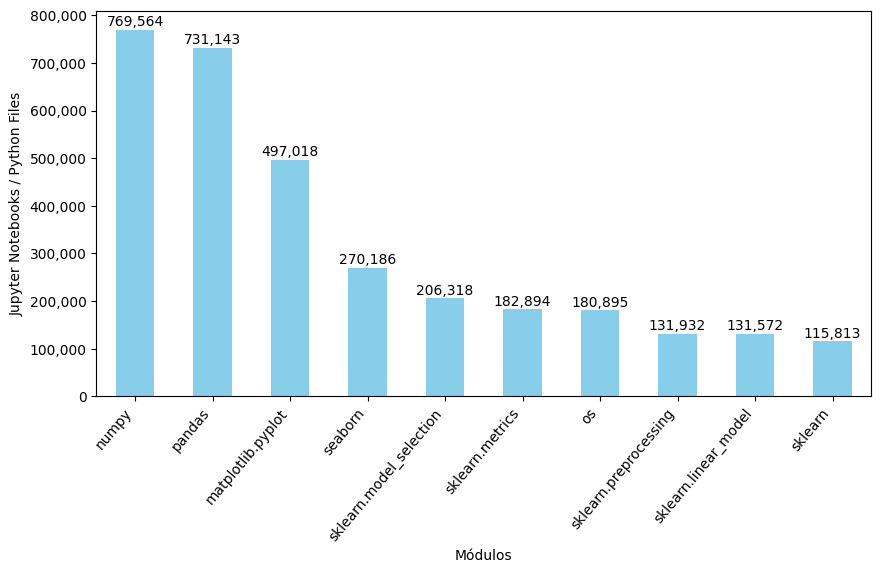

In [16]:
%autoreload 2
fig1, ax1, count1 = display_counts(any_any_modules["any_any"], width=10, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False,color=['skyblue'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha='right')
ax1.legend().set_visible(False)
ax1.set_ylabel("Jupyter Notebooks / Python Files")
ax1.set_xlabel("Módulos")
fig1.savefig("outputs/a4/modulos.png", dpi=500, bbox_inches='tight', format='png')

#### Most Common Toplevel Modules
Since modules can be nested in Python, a top level module is the topmost one in a import.

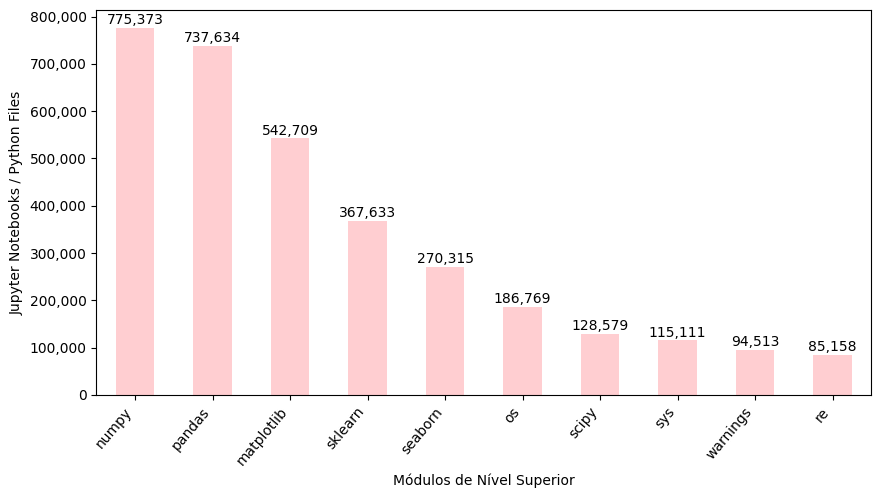

In [17]:
fig2, ax2, count2 = display_counts(any_any_modules["toplevel_any_any"], width=10, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False, color='#FFCED1')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=50, ha="right")
ax2.legend().set_visible(False)
ax2.set_ylabel("Jupyter Notebooks / Python Files")
ax2.set_xlabel("Módulos de Nível Superior")
fig2.savefig("outputs/a4/modulos_toplevel.png", dpi=500, bbox_inches='tight', format='png')

#### Most Used Import Types
In Python there are two ways to import modules:
- import: `import numpy`
- import_from: `from sklearn import datasets`

In [4]:
display(modules[["any_import_count", "any_import_from_count"]])

,any_import_count,any_import_from_count
0,0,0
1,3,1
2,0,0
3,6,1
4,7,2
...,...,...
1650473,4,9
1650474,6,3
1650475,6,3
1650476,0,0


In [8]:
modules[["any_import_count", "any_import_from_count"]].sum().rename(lambda x: x[:-6])

any_import         4457402
any_import_from    3712068
dtype: int64

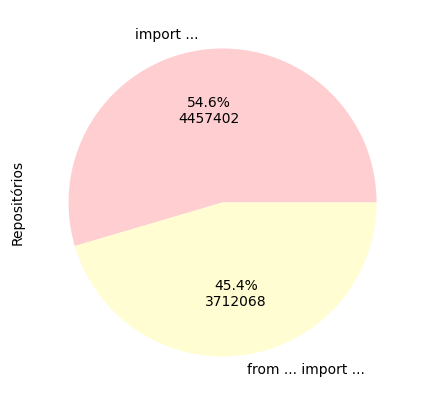

In [12]:
from src.helpers.h7_analysis_helpers import pastel_colormap
%autoreload 2
imports = modules[["any_import_count", "any_import_from_count"]].sum()\
    .rename(lambda x: x[:-6]).rename_axis('Types')\
    .to_frame("Modules").reset_index(drop=False).sort_values(by='Types')

fig3, ax3 = plt.subplots( figsize=(5,5))
imports.plot\
    .pie(ax=ax3, y="Modules", ylabel='Repositórios',
         labels=["import ...", "from ... import ..."],cmap=pastel_colormap(2),
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value,(imports["Modules"].sum())*prct_value/100)) )\
    .get_legend().remove()
fig3.savefig("outputs/a4/tipos_modulo.png", dpi=500, bbox_inches='tight', format='png')

#### Module Location Type
In Python you can both import local and external modules.

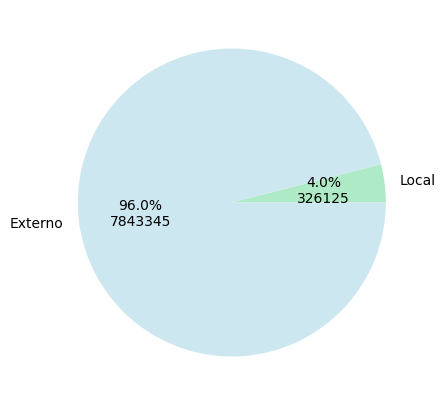

In [12]:
import matplotlib.colors as mcolors
local = modules["local_any_count"].sum()
external = modules["external_any_count"].sum()
location = pd.DataFrame({'Type':['local','external'], 'Modules':[local,external]})

fig4, ax4 = plt.subplots( figsize=(5,5))
location.plot\
    .pie(ax=ax4, y="Modules",
         labels=["Local", "Externo"], ylabel='',cmap=mcolors.ListedColormap(['#AEEAC6', '#CDE7F0']),
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value,(imports["Modules"].sum())*prct_value/100)) )\
    .get_legend().remove()
fig4.savefig("outputs/a4/local_modulo.png", dpi=500, bbox_inches='tight', format='png')

### Jupyter Notebooks
How are modules used in the Jupyter Notebooks we found specifically.

In [ ]:
sum_modules = notebook.any_any_count.sum()
all_modules = modules.any_any_count.sum()
percentage = sum_modules / all_modules * 100
print("In Jupyter Notebooks we found %d modules (%.2f%% of %d modules found)"
      % (sum_modules, percentage, all_modules))

#### Most Popular Modules

In [ ]:
fig5, ax5, count5 = display_counts(notebook_modules["any_any"], width=20, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False,color='skyblue')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=50, ha="right")
ax5.legend().set_visible(False)
ax5.set_title("Most Common Modules in Jupyter Notebooks")
ax5.set_ylabel("Number of Notebooks")
ax5.set_xlabel("Modules");

#### Most Common Toplevel Modules

In [ ]:
fig6, ax6, count6 = display_counts(notebook_modules["toplevel_any_any"], width=20, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False, color='skyblue')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=50, ha="right")
ax6.legend().set_visible(False)
ax6.set_title("Most Common Top Level Modules in Jupyter Notebooks")
ax6.set_ylabel("Number of Notebook Modules")
ax6.set_xlabel("Modules");

#### Most Used Import Types

In [ ]:
imports = notebook_modules[["any_import_count", "any_import_from_count", "any_load_ext_count"]].sum()\
    .rename(lambda x: x[:-6]).rename_axis('Types')\
    .to_frame("Modules").reset_index(drop=False).sort_values(by='Types')

fig7, ax7 = plt.subplots( figsize=(3,3))
imports.plot\
    .pie(ax=ax7, y="Modules", title="Most Common Import Types in Jupyter Notebooks",
         labels=["import", "import_from", "load_ext"], ylabel='',cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value,(imports["Modules"].sum())*prct_value/100)) )\
    .get_legend().remove()

#### Module Location Type

In [ ]:
local = notebook_modules["local_any_count"].sum()
external = notebook_modules["external_any_count"].sum()
location = pd.DataFrame({'Type':['local','external'], 'Modules':[local,external]})

fig8, ax8 = plt.subplots( figsize=(3,3))
location.plot\
    .pie(ax=ax8, y="Modules", title="Local x External in Jupyter Notebooks",
         labels=["Local", "External"], ylabel='',cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value,(imports["Modules"].sum())*prct_value/100)) )\
    .get_legend().remove()

### Python Files
How are modules used in the Jupyter Notebooks we found specifically.

In [ ]:
valid_python_files = session.query(PythonFile).filter(PythonFile.state==PF_AGGREGATED).count()
python_file_modules = modules[modules.type=='python_file']
sum_modules2 = python_file_modules.any_any_count.sum()
all_modules2 = modules.any_any_count.sum()
percentage2 = sum_modules2 / all_modules2 * 100
print("In the %d valid Jupyter Notebooks we found %d modules (%.2f%% of %d modules found)"
      % (valid_python_files, sum_modules2, percentage2, all_modules2))

In [ ]:
fig9, ax9, count9 = display_counts(python_file_modules["any_any"], width=20, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False, color='skyblue')
ax9.set_xticklabels(ax9.get_xticklabels(), rotation=50, ha="right")
ax9.legend().set_visible(False)
ax9.set_title("Most Common Modules in Python Files")
ax9.set_ylabel("Number of Python Files")
ax9.set_xlabel("Modules");

#### Most Popular Modules

In [ ]:
fig10, ax10, count10 = display_counts(python_file_modules["toplevel_any_any"], width=20, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False, color='skyblue')
ax10.set_xticklabels(ax10.get_xticklabels(), rotation=50, ha="right")
ax10.legend().set_visible(False)
ax10.set_title("Most Common Top Level Modules in Python Files")
ax10.set_ylabel("Number of Pyhton Files")
ax10.set_xlabel("Modules");

In [ ]:

imports = python_file_modules[["any_import_count", "any_import_from_count", "any_load_ext_count"]].sum() \
    .rename(lambda x: x[:-6]).rename_axis('Types') \
    .to_frame("Modules").reset_index(drop=False).sort_values(by='Types')

fig11, ax11 = plt.subplots(figsize=(3, 3))
imports.plot \
    .pie(ax=ax11, y="Modules", title="Most Common Import Types in Python Files",
         labels=["import", "import_from", "load_ext"], ylabel='', cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (imports["Modules"].sum()) * prct_value / 100))) \
    .get_legend().remove()

#### Most Used Import Types

In [ ]:
local = python_file_modules["local_any_count"].sum()
external = notebook_modules["external_any_count"].sum()
location = pd.DataFrame({'Type': ['local', 'external'], 'Modules': [local, external]})

fig12, ax12 = plt.subplots(figsize=(3, 3))
location.plot \
    .pie(ax=ax12, y="Modules", title="Local x External in Python Files",
         labels=["Local", "External"], ylabel='', cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (imports["Modules"].sum()) * prct_value / 100))) \
    .get_legend().remove()